In [1]:
import supervision as sv
import numpy as np
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

# initiate polygon zone
polygon = np.array([        
    [1170,1078],
    [1308,648],
    [1600,686],
    [1700,1076]
])
zone = sv.PolygonZone(polygon=polygon)
# extract video frame
generator = sv.get_video_frames_generator("data/4_safe_walkway/4_te6.mp4")  

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.RED, thickness=3, text_thickness=3, text_scale=4, display_in_zone_count=False)

def callback(frame: np.ndarray, _) -> np.ndarray:
    # detect
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[detections.class_id == 0]
    zone.trigger(detections=detections)
    
    # annotate
    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections)
    frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
    frame = zone_annotator.annotate(scene=frame)    
    if zone.trigger(detections=detections).any():
        text_anchor = sv.Point(x=1050, y=550)
        frame = sv.draw_text(scene=frame, text="PELIGRO!",text_anchor=text_anchor,text_thickness=2, text_scale = 1.5, background_color = sv.Color.RED, text_color=sv.Color.WHITE)
    return frame

sv.process_video(source_path="data/0_safe_walkway_violation/0_te1.mp4", target_path=f"data/result_0_te1.mp4", callback=callback)

from IPython import display
display.clear_output()

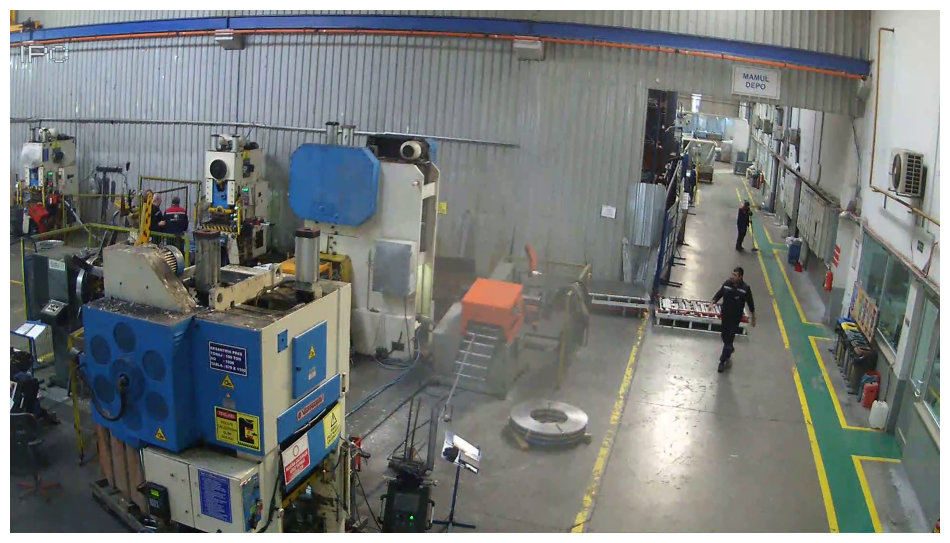


0: 736x1280 3 persons, 1 car, 1 truck, 10.1ms
Speed: 4.0ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 736, 1280)


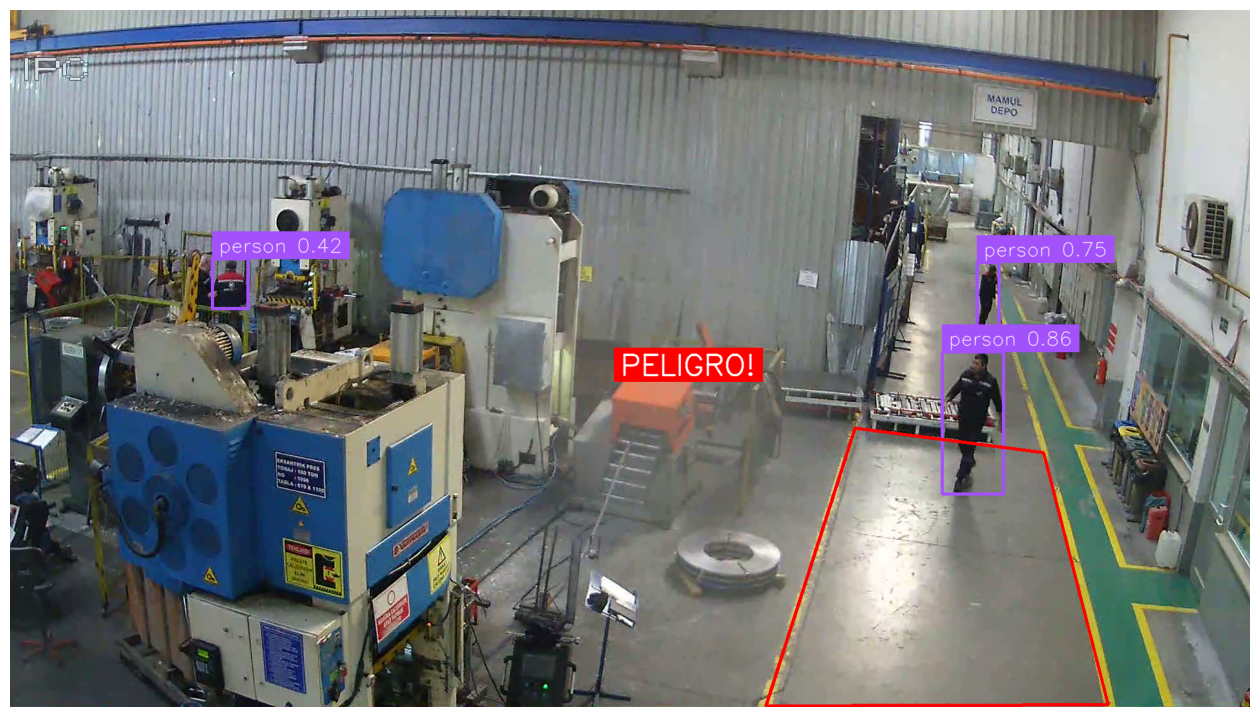

In [5]:
import supervision as sv
import numpy as np
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

# initiate polygon zone
polygon = np.array([        
    [1170,1078],
    [1308,648],
    [1600,686],
    [1700,1076]
])
zone = sv.PolygonZone(polygon=polygon)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=1)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.RED, thickness=3, display_in_zone_count=False)

#frame
generator = sv.get_video_frames_generator(source_path="data/0_safe_walkway_violation/0_te1.mp4")
iterator = iter(generator)
frame = next(iterator)
frame_count = 1
for i in range(350):
    frame = next(iterator)    
sv.plot_image(frame)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)

# annotate
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame) 

if zone.trigger(detections=detections).any():
    text_anchor = sv.Point(x=1050, y=550)
    frame = sv.draw_text(scene=frame, text="PELIGRO!",text_anchor=text_anchor,text_thickness=2, text_scale = 1.5, background_color = sv.Color.RED, text_color=sv.Color.WHITE)

%matplotlib inline
sv.plot_image(frame, (16, 16))